In [1]:
import numpy as np
ori_des=np.array([[1 , -1 , -1 , -1 , +1 , -1 , -1 , -1 , +1 , +1 , +1 , +1 , -1 , +1 ],
[1 , -1 , +1 , -1 , -1 , +1 , -1 , +1 , +1 , -1 , -1 , +1 , +1 , +1 ],
[1 , -1 , +1 , -1 , +1 , +1 , +1 , -1 , -1 , -1 , +1 , -1 , +1 , +1 ],
[1 , +1 , +1 , +1 , -1 , -1 , -1 , -1 , -1 , +1 , -1 , -1 , +1 , +1 ],
[1 , -1 , -1 , +1 , -1 , -1 , +1 , +1 , -1 , -1 , -1 , +1 , -1 , +1 ],
[1 , -1 , +1 , +1 , +1 , -1 , -1 , -1 , +1 , +1 , -1 , -1 , -1 , +1 ],
[1 , +1 , +1 , -1 , -1 , -1 , +1 , -1 , +1 , -1 , +1 , -1 , -1 , +1 ],
[1 , +1 , -1 , -1 , -1 , +1 , -1 , -1 , -1 , +1 , +1 , +1 , +1 , +1 ],
[1 , +1 , -1 , +1 , +1 , +1 , -1 , +1 , -1 , -1 , +1 , -1 , -1 , +1 ],
[1 , -1 , -1 , +1 , -1 , +1 , +1 , +1 , -1 , -1 , -1 , +1 , -1 , +1 ],
[1 , +1 , +1 , +1 , +1 , +1 , +1 , +1 , +1 , +1 , +1 , +1 , +1 , +1 ],
[1 , +1 , -1 , -1 , +1 , -1 , +1 , +1 , +1 , +1 , -1 , -1 , +1 , +1 ]])

In [2]:
def row_trans(per_row):
    """根据6个主效应求出对应的6个交互效应"""
    if type(per_row) != 'numpy.ndarray':
        per_row=np.array(per_row)
    per_row[7:]=np.array([per_row[1]*per_row[4],per_row[1]*per_row[6],per_row[2]*per_row[3],\
        per_row[2]*per_row[6],per_row[3]*per_row[6],per_row[4]*per_row[6],-1])
    return per_row

In [3]:
import random
def trans(or_mod):
    """坐标交换算法，第一个返回值为行列式，第二个返回值为模型阵"""
    #生成初始设计
    init_mod=or_mod
    for i in range(8):
        per_row=[1]
        per_row+=[random.uniform(-1,1) for _ in range(13)]
        per_row=row_trans(per_row)
        init_mod=np.concatenate((init_mod,np.array([per_row])),axis=0)
    improve=True
    while improve:
        improve=False
        for i in range(8):
            for j in range(6):
                old_det=np.linalg.det(init_mod.T@init_mod)
                old_row=init_mod[i+12,:]
                init_mod[i+12,j+1]=1
                init_mod[i+12,:]=row_trans(init_mod[i+12,:])
                det_1=np.linalg.det(init_mod.T@init_mod)
                init_mod[i+12,j+1]=-1
                init_mod[i+12,:]=row_trans(init_mod[i+12,:])
                det_m1=np.linalg.det(init_mod.T@init_mod)
                improve=True
                if (det_1<=old_det)&(det_m1<=old_det):
                    improve=False
                    init_mod[i+12,:]=old_row
                if det_1>det_m1:
                    init_mod[i+12,j+1]=1
                    init_mod[i+12,:]=row_trans(init_mod[i+12,:])
    return [np.linalg.det(init_mod.T@init_mod),init_mod]


In [4]:
def d_opt(num_of_ori):
    """第一个返回值是行列式，第二个返回值是模型阵"""
    testori=[trans(ori_des) for _ in range(num_of_ori)]
    test=list(zip(*testori))[0]
    maxind=test.index(max(test))
    return (testori[maxind][0],testori[maxind][1])

Text(0.5, 1.0, '初始阵个数从0取到15')

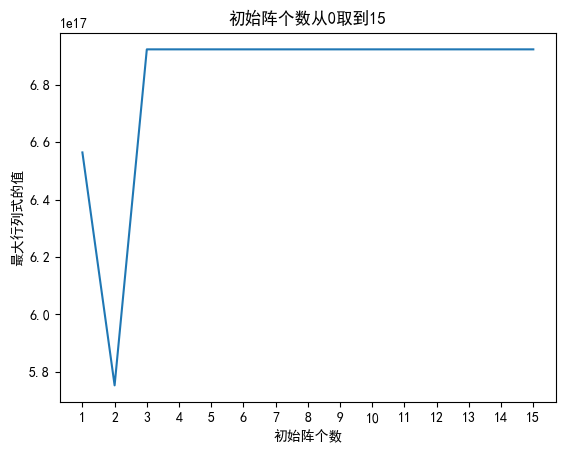

In [5]:
opt_det=[]
iter_range=15
for i in range(iter_range):
    opt_det.append(d_opt(i+1)[0])
import matplotlib.pyplot as plt
plt.plot(np.arange(iter_range)+1,opt_det)
plt.rcParams['font.sans-serif'] = ['Kaitt', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.xticks(np.arange(iter_range)+1)
plt.xlabel("初始阵个数")
plt.ylabel("最大行列式的值")
plt.title("初始阵个数从0取到15")

Text(0.5, 1.0, '初始阵个数从0取到200')

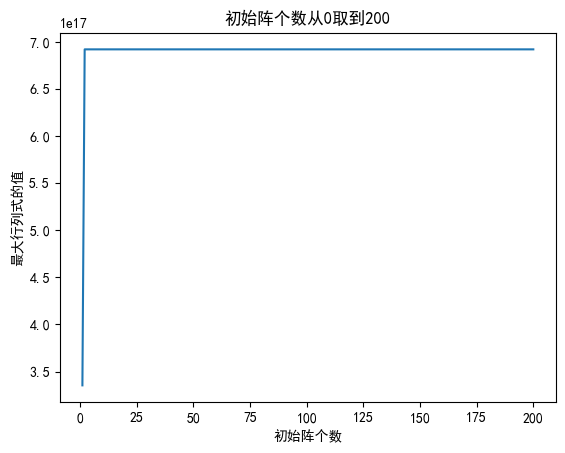

In [6]:
opt_det=[]
iter_range=200
for i in range(iter_range):
    opt_det.append(d_opt(i+1)[0])
import matplotlib.pyplot as plt
plt.plot(np.arange(iter_range)+1,opt_det)
plt.rcParams['font.sans-serif'] = ['Kaitt', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel("初始阵个数")
plt.ylabel("最大行列式的值")
plt.title("初始阵个数从0取到200")

## 统计分析：

让初始阵个数分别从1取到iter_range，输出各初始阵个数下得到的最大的行列式值并作图如上。一般而言，初始阵个数越多，最大行列式值越容易达到全局最大值，越能更加稳定地保持在全局最大值处。对于本例第一个图，随着初始阵个数的增大，在1个和2个处最大行列式值还出现了波动，从3个之后最大行列式值就稳定地保持在了全局最大值处。第二个图也是在初始阵个数很小的时候最大行列式值未能达到全局最大值，初始阵个数稍微变大一点，最大行列式值就达到且稳定地保持在了全局最大值处。一般需要初始阵个数较大时最大行列式值才能达到并且稳定在全局最大值处；但对于本例的两个图而言，在初始阵个数较小的时候就已经达到并稳定地保持在全局最大值处了，是一个特例。

#### 输出20个初始阵时的最大行列式和最大行列式对应的模型矩阵如下：

In [7]:
print(d_opt(20)[0])
print(d_opt(20)[1])

6.924284427082154e+17
[[ 1. -1. -1. -1.  1. -1. -1. -1.  1.  1.  1.  1. -1.  1.]
 [ 1. -1.  1. -1. -1.  1. -1.  1.  1. -1. -1.  1.  1.  1.]
 [ 1. -1.  1. -1.  1.  1.  1. -1. -1. -1.  1. -1.  1.  1.]
 [ 1.  1.  1.  1. -1. -1. -1. -1. -1.  1. -1. -1.  1.  1.]
 [ 1. -1. -1.  1. -1. -1.  1.  1. -1. -1. -1.  1. -1.  1.]
 [ 1. -1.  1.  1.  1. -1. -1. -1.  1.  1. -1. -1. -1.  1.]
 [ 1.  1.  1. -1. -1. -1.  1. -1.  1. -1.  1. -1. -1.  1.]
 [ 1.  1. -1. -1. -1.  1. -1. -1. -1.  1.  1.  1.  1.  1.]
 [ 1.  1. -1.  1.  1.  1. -1.  1. -1. -1.  1. -1. -1.  1.]
 [ 1. -1. -1.  1. -1.  1.  1.  1. -1. -1. -1.  1. -1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1. -1. -1.  1. -1.  1.  1.  1.  1. -1. -1.  1.  1.]
 [ 1.  1.  1. -1.  1. -1. -1.  1. -1. -1. -1.  1. -1. -1.]
 [ 1. -1.  1.  1. -1. -1.  1.  1. -1.  1.  1.  1. -1. -1.]
 [ 1. -1. -1.  1. -1. -1. -1.  1.  1. -1.  1. -1.  1. -1.]
 [ 1. -1. -1.  1.  1. -1.  1. -1. -1. -1. -1.  1.  1. -1.]
 [ 1. -1.  1.  1.  1.  1. -1. -1. 

#### 输出200个初始阵时的最大行列式和最大行列式对应的模型矩阵如下：

In [8]:
print(d_opt(200)[0])
print(d_opt(200)[1])

6.924284427082154e+17
[[ 1. -1. -1. -1.  1. -1. -1. -1.  1.  1.  1.  1. -1.  1.]
 [ 1. -1.  1. -1. -1.  1. -1.  1.  1. -1. -1.  1.  1.  1.]
 [ 1. -1.  1. -1.  1.  1.  1. -1. -1. -1.  1. -1.  1.  1.]
 [ 1.  1.  1.  1. -1. -1. -1. -1. -1.  1. -1. -1.  1.  1.]
 [ 1. -1. -1.  1. -1. -1.  1.  1. -1. -1. -1.  1. -1.  1.]
 [ 1. -1.  1.  1.  1. -1. -1. -1.  1.  1. -1. -1. -1.  1.]
 [ 1.  1.  1. -1. -1. -1.  1. -1.  1. -1.  1. -1. -1.  1.]
 [ 1.  1. -1. -1. -1.  1. -1. -1. -1.  1.  1.  1.  1.  1.]
 [ 1.  1. -1.  1.  1.  1. -1.  1. -1. -1.  1. -1. -1.  1.]
 [ 1. -1. -1.  1. -1.  1.  1.  1. -1. -1. -1.  1. -1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1. -1. -1.  1. -1.  1.  1.  1.  1. -1. -1.  1.  1.]
 [ 1. -1. -1.  1. -1. -1. -1.  1.  1. -1.  1. -1.  1. -1.]
 [ 1.  1. -1.  1. -1.  1.  1. -1.  1. -1. -1.  1. -1. -1.]
 [ 1.  1.  1. -1.  1. -1. -1.  1. -1. -1. -1.  1. -1. -1.]
 [ 1. -1. -1. -1. -1.  1.  1.  1. -1.  1. -1. -1. -1. -1.]
 [ 1. -1.  1.  1. -1. -1.  1.  1. 